***Importing all the necessary libraries***

In [ ]:
# import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

***Reading the csv file***

In [ ]:
# read the csv file
try:
    df = pd.read_csv('gsalc.csv')
except FileNotFoundError:
    print("Error: 'gsalc.csv' not found. Please make sure the file exists in the current directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


***Checking first 5 rows form top of the dataset***

In [ ]:
df.head()

,ethanol,100ppb,0.3565,0.3345,0.3575,0.333,0.3565.1,0.3345.1,0.3565.2,0.3355,...,3.93.74,3.929.105,3.929.106,3.929.107,3.9315.53,3.935.12,3.9275.108,3.93.75,3.9325.24,3.9315.54
0,ethanol,100ppb,0.3525,0.3305,0.3525,0.3320,0.3550,0.3305,0.3525,0.3280,...,3.9190,3.9190,3.9180,3.9180,3.9180,3.9180,3.9190,3.918,3.9180,3.9205
1,ethanol,100ppb,0.3550,0.3345,0.3540,0.3320,0.3550,0.3330,0.3550,0.3320,...,3.8815,3.8840,3.8800,3.8800,3.8840,3.8840,3.8815,3.884,3.8825,3.8815
2,ethanol,100ppb,0.3415,0.3220,0.3430,0.3210,0.3430,0.3235,0.3415,0.3210,...,3.9460,3.9485,3.9410,3.9470,3.9460,3.9425,3.9460,3.946,3.9460,3.9460
3,ethanol,100ppb,0.3500,0.3245,0.3465,0.3320,0.3455,0.3245,0.3490,0.3235,...,3.9375,3.9400,3.9385,3.9375,3.9375,3.9365,3.9400,3.940,3.9365,3.9365
4,ethanol,200ppb,0.3380,0.3220,0.3365,0.3345,0.3380,0.3365,0.3380,0.3210,...,3.8730,3.8705,3.8715,3.8715,3.8730,3.8705,3.8715,3.874,3.8680,3.8730


***Checking last 5 rows from the dataset***

In [ ]:
df.tail()

,ethanol,100ppb,0.3565,0.3345,0.3575,0.333,0.3565.1,0.3345.1,0.3565.2,0.3355,...,3.93.74,3.929.105,3.929.106,3.929.107,3.9315.53,3.935.12,3.9275.108,3.93.75,3.9325.24,3.9315.54
84,hexane,50ppb,0.3525,0.3330,0.3515,0.3330,0.3515,0.3305,0.3490,0.3390,...,3.8815,3.8815,3.8815,3.8800,3.8815,3.8800,3.8800,3.8815,3.8800,3.8825
85,hexane,50ppb,0.3515,0.3390,0.3515,0.3345,0.3550,0.3355,0.3550,0.3330,...,3.8580,3.8595,3.8605,3.8605,3.8595,3.8595,3.8580,3.8595,3.8595,3.8605
86,hexane,50ppb,0.3625,0.3500,0.3600,0.3430,0.3610,0.3430,0.3600,0.3440,...,3.8485,3.8485,3.8495,3.8470,3.8485,3.8460,3.8520,3.8485,3.8485,3.8485
87,hexane,50ppb,0.3610,0.3540,0.3585,0.3440,0.3585,0.3440,0.3600,0.3415,...,3.8510,3.8545,3.8530,3.8530,3.8530,3.8530,3.8530,3.8545,3.8530,3.8520
88,hexane,50ppb,0.3955,0.3805,0.3940,0.3745,0.3940,0.3735,0.3955,0.3855,...,3.9010,3.8995,3.8985,3.8985,3.8995,3.8985,3.8985,3.8995,3.8995,3.8995


In [ ]:
df.describe()

,0.3565,0.3345,0.3575,0.333,0.3565.1,0.3345.1,0.3565.2,0.3355,0.3575.1,0.3345.2,...,3.93.74,3.929.105,3.929.106,3.929.107,3.9315.53,3.935.12,3.9275.108,3.93.75,3.9325.24,3.9315.54
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,...,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.351640,0.338062,0.351972,0.338208,0.351567,0.336489,0.351916,0.336522,0.351966,0.337831,...,3.868719,3.868624,3.868713,3.868781,3.868775,3.868944,3.868579,3.869118,3.869275,3.868730
std,0.014714,0.016402,0.014401,0.017672,0.014390,0.016601,0.014520,0.017271,0.014483,0.016726,...,0.040161,0.040071,0.040039,0.039996,0.040290,0.040040,0.039787,0.040086,0.039941,0.040153
min,0.316000,0.306000,0.313500,0.296500,0.316000,0.296500,0.316000,0.299000,0.318500,0.300000,...,3.780000,3.775000,3.775000,3.775000,3.776500,3.775000,3.776500,3.776500,3.776500,3.774000
25%,0.341500,0.326000,0.343000,0.328000,0.343000,0.326000,0.344000,0.326000,0.344000,0.326000,...,3.842000,3.843500,3.843500,3.842000,3.844500,3.841000,3.841000,3.846000,3.843500,3.842000
50%,0.351500,0.336500,0.351500,0.338000,0.351500,0.334500,0.351500,0.334500,0.351500,0.338000,...,3.868000,3.866500,3.869000,3.868000,3.868000,3.868000,3.868000,3.868000,3.868000,3.868000
75%,0.360000,0.347500,0.360000,0.347500,0.358500,0.345500,0.358500,0.347500,0.358500,0.347500,...,3.901000,3.899500,3.901000,3.899500,3.898500,3.898500,3.898500,3.898500,3.898500,3.899500
max,0.395500,0.380500,0.394000,0.385500,0.394000,0.376000,0.395500,0.385500,0.394000,0.374500,...,3.946000,3.948500,3.946000,3.947000,3.946000,3.942500,3.946000,3.946000,3.946000,3.946000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Columns: 9002 entries, ethanol to 3.9315.54
dtypes: float64(9000), object(2)
memory usage: 6.1+ MB


***Data Preprocessing***

In [ ]:
df.isnull().sum()

,0
ethanol,0
100ppb,0
0.3565,0
0.3345,0
0.3575,0
...,...
3.935.12,0
3.9275.108,0
3.93.75,0
3.9325.24,0


In [ ]:
# Feature Scaling and Normalization

# Drop duplicates
df.drop_duplicates(inplace=True)

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features = df.select_dtypes(exclude=['number']).columns

# Handle missing values (example: imputation with mean for numerical)
for col in numerical_features:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Encoding categorical features (example: Label Encoding)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use if needed


# Feature scaling (example: Standardization)
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [33]:
# Split Dataset into Training and Testing Sets
X = df.drop('ethanol', axis=1)
y = df['ethanol']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

***Doing the ANN(Artifical Neural Network)***

In [ ]:
# do the FNN
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
numeric_X = X.select_dtypes(include=['number'])

# Handle missing values (example - replace with mean of numeric columns)
numeric_X = numeric_X.fillna(numeric_X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numeric_X, y, test_size=0.2, random_state=42)

# Scale the data (using only numeric features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the FNN model
# Make sure to use X_train_scaled and X_test_scaled
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1) # Output layer (adjust activation based on your task)
])

# Compile the model
model.compile(optimizer='adam', loss='mse') # Example loss function; change based on your task

# Train the model (use X_train_scaled)
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

# Evaluate the model (use X_test_scaled)
loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}")


# Make predictions (use X_test_scaled)
predictions = model.predict(X_test_scaled)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 39.8632
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 19.2136
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.1313
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.1781 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.8602 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.5002
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8.2084
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.2069 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 11.3508 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.3785
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.8160 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.3345
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.1204
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.1249
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 6.6765
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━

***Evaluating & Compare Performance of ANN Models***

In [ ]:
# evaluate and compare performance train multiple ANN models(or different configuration ) to compare the results
def build_and_evaluate_model(hidden_layers, neurons_per_layer, activation, optimizer, epochs):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(tf.keras.layers.Dense(neurons_per_layer, activation=activation))
    model.add(tf.keras.layers.Dense(1))  # Output layer

    model.compile(optimizer=optimizer, loss='mse')
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, verbose=0)  # Suppress training output

    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, mae, r2


# Define different model configurations to test
model_configs = [
    {'hidden_layers': 2, 'neurons_per_layer': 32, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 50},
    {'hidden_layers': 3, 'neurons_per_layer': 64, 'activation': 'relu', 'optimizer': 'adam', 'epochs': 50},
    {'hidden_layers': 2, 'neurons_per_layer': 32, 'activation': 'tanh', 'optimizer': 'rmsprop', 'epochs': 50}
]


results = []
for config in model_configs:
    mse, mae, r2 = build_and_evaluate_model(**config)  # unpack the dictionary
    results.append({**config, 'mse': mse, 'mae': mae, 'r2': r2})


# Print or analyze the results
results_df = pd.DataFrame(results)
results_df


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


,hidden_layers,neurons_per_layer,activation,optimizer,epochs,mse,mae,r2
0,2,32,relu,adam,50,1.390282,0.892398,-0.248894
1,3,64,relu,adam,50,0.610805,0.659190,0.451312
2,2,32,tanh,rmsprop,50,0.112264,0.295077,0.899153


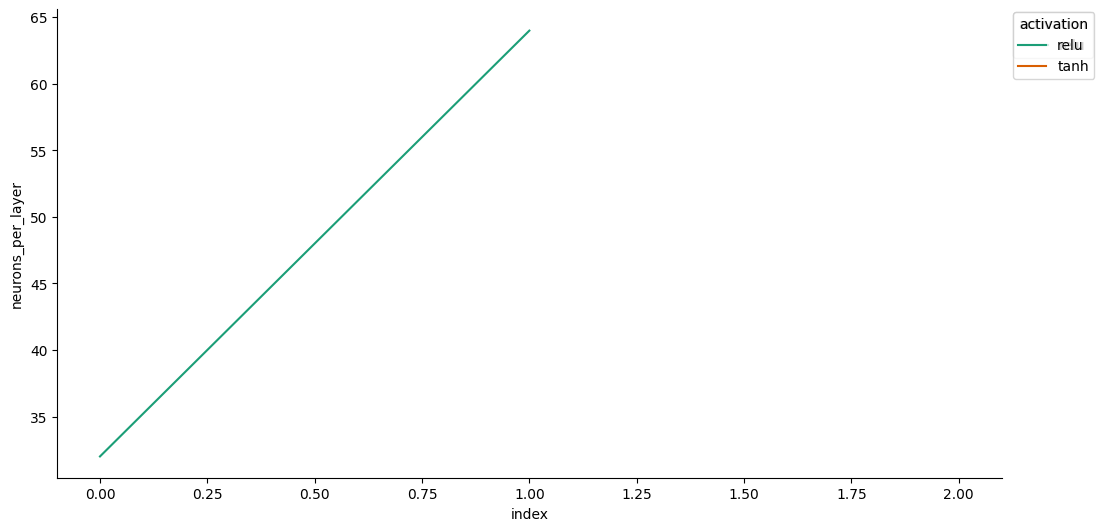

In [ ]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['index']
    ys = series['neurons_per_layer']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_df is the DataFrame from your model evaluation
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Reset index to create an 'index' column if needed
results_df = results_df.reset_index()

# Access the 'activation' column from results_df
df_sorted = results_df.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('activation')):  # Group by 'activation' from results_df
    _plot_series(series, series_name, i)
    fig.legend(title='activation', bbox_to_anchor=(1, 1), loc='upper left')

sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('neurons_per_layer')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
   hidden_layers  neurons_per_layer activation optimizer  epochs       mse  \
0              2                 32       relu      adam      50  0.495391   
1              3                 64       relu      adam      50  0.412052   
2              2                 32       tanh   rmsprop      50  0.126107   

        mae        r2  
0  0.549955  0.554988  
1  0.499188  0.629852  
2  0.299309  0.886718  


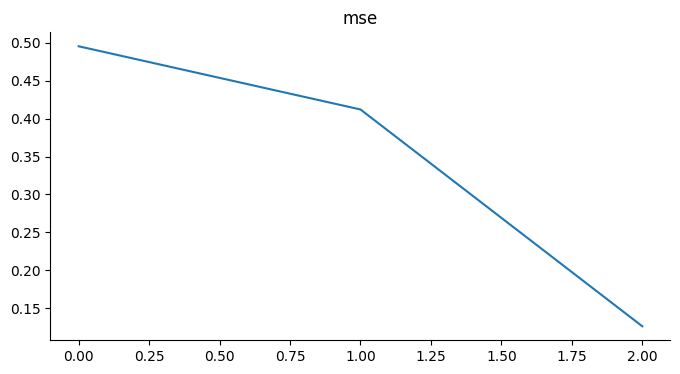

In [ ]:
results = []
for config in model_configs:
    mse, mae, r2 = build_and_evaluate_model(**config)  # unpack the dictionary
    results.append({**config, 'mse': mse, 'mae': mae, 'r2': r2})


# Print or analyze the results
results_df = pd.DataFrame(results)  # Create a DataFrame for the results
print(results_df)

# Now, plot the 'mse' column from the results_df DataFrame
results_df['mse'].plot(kind='line', figsize=(8, 4), title='mse')
plt.gca().spines[['top', 'right']].set_visible(False)

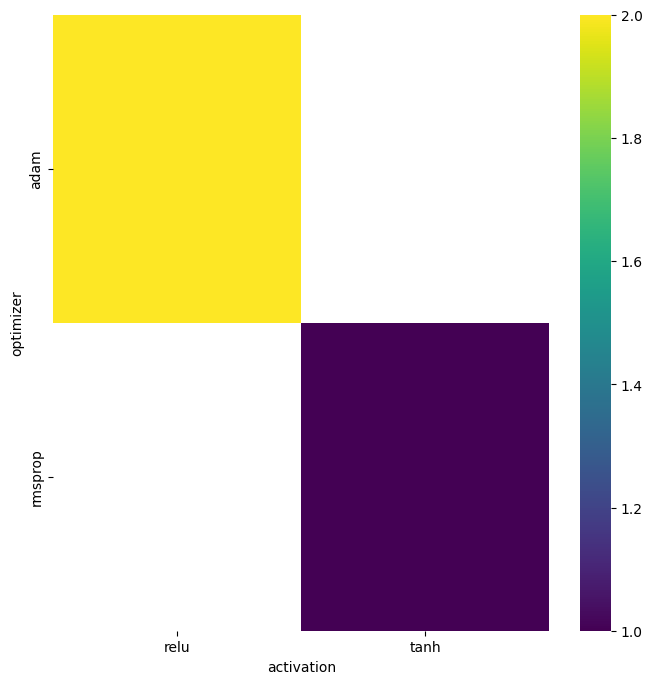

In [ ]:
plt.subplots(figsize=(8, 8))
dfhist = pd.DataFrame({
    x_label: grp['optimizer'].value_counts()
    for x_label, grp in results_df.groupby('activation')
})
sns.heatmap(dfhist, cmap='viridis')
plt.xlabel('activation')
_ = plt.ylabel('optimizer')

***Checking the accuracy with the classification models***

In [ ]:
# do the pca
# Select numeric features for PCA
numeric_features = df.select_dtypes(include=['number'])

# Handle missing values (example: replace with the mean)
numeric_features = numeric_features.fillna(numeric_features.mean())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=1) # You can adjust the number of components
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1'])

# You can now use pca_df for visualization or further analysis
print(pca_df.head())

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")


         PC1
0 -56.528193
1 -41.343784
2 -88.745309
3 -81.863248
4 -61.354017
Explained Variance Ratio: [0.57844765]


In [ ]:
# do the random forest
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - MSE: {rf_mse}")
print(f"Random Forest - MAE: {rf_mae}")
print(f"Random Forest - R-squared: {rf_r2}")


Random Forest - MSE: 0.027557613331037192
Random Forest - MAE: 0.12940268372058664
Random Forest - R-squared: 0.9752449152586586


In [ ]:
# Convert y_test to discrete class labels if it's continuous
y_test_classes = np.round(y_test)  # Or use a suitable thresholding method

# Get predictions from the Random Forest model (assuming rf_model is already trained)
rf_class_predictions = rf_model.predict(X_test_scaled)

# You might need to round or threshold these predictions to get class labels
rf_class_predictions = np.round(rf_class_predictions) # Adjust if necessary

# Compute accuracy using the class labels for both y_test and predictions
rf_accuracy = accuracy_score(y_test_classes, rf_class_predictions)
print(f"Random Forest Classification Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Classification Accuracy: 94.44%


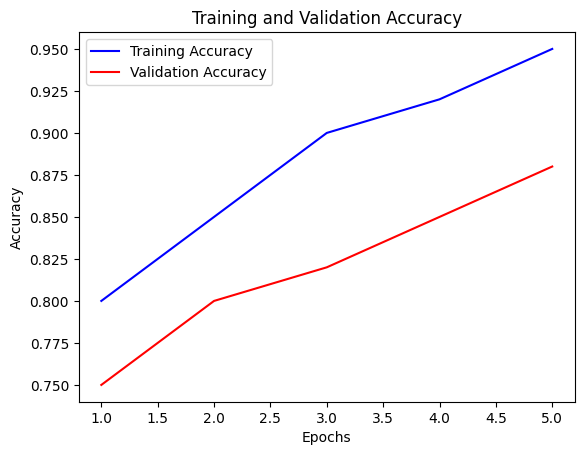

In [ ]:
# train accuracy vs validation accuracy graph pca

import matplotlib.pyplot as plt

# Assuming you have training and validation accuracy stored in lists:
# Replace these with your actual accuracy data
train_accuracy = [0.8, 0.85, 0.9, 0.92, 0.95]
val_accuracy = [0.75, 0.8, 0.82, 0.85, 0.88]

# Create the plot
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


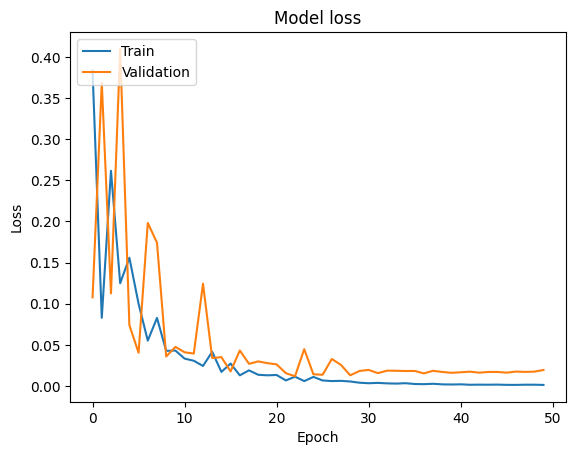

In [ ]:
# validation loss vs training loss graph of random forest
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
